In [1]:
ls xxx

xxx


In [2]:
import csv

def read_unicity_file(filename):
    d = {}
    with open(filename, newline="") as fp:
        r = csv.reader(fp)
        for n, row in enumerate(r):
            #if n > 100000: break
            ident = row[0]
            unicity_trace = list(map(int, row[2:]))
            d[ident] = unicity_trace
    return d

In [3]:
d = read_unicity_file('xxx')

In [4]:
n_unique = 0
n_infinite = 0
for k, v in d.items():
    if v[-1] != 1:
        n_infinite += 1
        #print(len(v), v[-3:])
    if len(v) == 1:
        n_unique += 1

print(f"{n_unique / len(d) * 100:.01f}, {n_infinite * 100 / len(d):.01f}")

15.3, 29.1


In [5]:
len(d)

258263

In [6]:
z = []
z2 = []
for k, v in d.items():
    z.append(len(v))
    z2.append(dict(ident=k, unicity=len(v)))

In [7]:
import pandas as pd
df = pd.DataFrame(z2)

In [8]:
df.describe()

,unicity
count,258263.000000
mean,144.635112
std,187.981446
min,1.000000
25%,5.000000
50%,34.000000
75%,253.000000
max,1172.000000


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


(array([ 99216., 120259., 131215., 138484., 144299., 148719., 152240.,
        155524., 158812., 161483., 163543., 165647., 167488., 169341.,
        172317., 175793., 179061., 181318., 184122., 188426., 192219.,
        195067., 199791., 204507., 206331., 208359., 210076., 211368.,
        212531., 213419., 214342., 215667., 216654., 218195., 221083.,
        226206., 227624., 228787., 230206., 232977., 235790., 238432.,
        241108., 243185., 244612., 245980., 247679., 249685., 251380.,
        252166., 252775., 253187., 253658., 254220., 254671., 255056.,
        255349., 255614., 255961., 256443., 256789., 257188., 257357.,
        257472., 257581., 257648., 257740., 257808., 257866., 257951.,
        257981., 258017., 258061., 258091., 258115., 258138., 258159.,
        258175., 258191., 258209., 258221., 258224., 258228., 258232.,
        258235., 258236., 258242., 258247., 258248., 258250., 258251.,
        258252., 258252., 258258., 258259., 258261., 258261., 258261.,
      

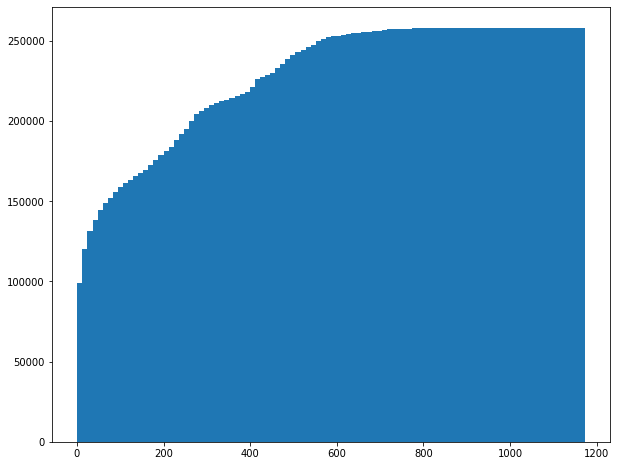

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(z, cumulative=True, bins=100)